In [56]:
import sys
sys.path.append("/home/jemonet/Documents/These/Code/Graphes")
sys.path.append("/user/jemonet/home/Documents/These/stimuli")
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from figure_lib.src.data_transform.GraphDF import GraphDF
# from figure_lib.src.make_figure.figure import Figure
import seaborn as sns

import figure_lib.src.data_transform.GraphDF as gdf
import figure_lib.src.make_figure.figure as fg
import stim_help_functions as shf


#%matplotlib qt
%matplotlib inline

In [116]:
print("FS :",np.load("/user/jemonet/home/Documents/These/Code/2DModel-Roques2020-updated/data/FS-cell_CONFIG1_fit.npy"),"\n")
print("RS :",np.load("/user/jemonet/home/Documents/These/Code/2DModel-Roques2020-updated/data/RS-cell_CONFIG1_fit.npy"),"\n")

FS : [-5.39174436e-02  4.07642701e-03  1.69747036e-03  9.11869386e-04
 -3.43496494e-05  5.00307136e-04  6.52314112e-05  2.42498031e-05
 -2.34327870e-03 -1.15712989e-04  1.48402587e-04] 

RS : [-0.05471508  0.00764454 -0.00462723  0.00171283 -0.00010711  0.00072054
 -0.00200464  0.00011756  0.00561326 -0.00099436 -0.00287604] 



In [58]:
path = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Retinocortical/all_cells_noGC_noAma_noSurr_extdrive0,002_Lexc10.csv"

df = gdf.GraphDF(path,0.00878,60,20,20)

df_exc = df.isolate_dataframe_byoutputs("v_e")
df_inh = df.isolate_dataframe_byoutputs("v_i")

In [106]:
m = df_exc.data.max().max()
df_exc.data.max().idxmax()
df_exc.data.loc[:,"v_e (1389) CorticalExcitatory"].idxmax()

0.057526560000000004

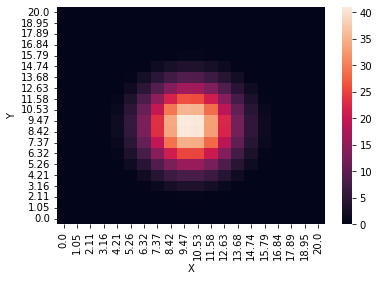

In [59]:
data_t = df_inh.data.iloc[399]

x = [round(i,2) for i in np.linspace(20,0,20)]
y = [round(i,2) for i in np.linspace(0,20,20)]

new_df = pd.DataFrame(0,index=x, columns=y)
new_df.index.name = "Y"
new_df.columns.name = "X"

for x in range(20):
    for y in range(20):
        new_df.iloc[19-y,x] = data_t.iloc[20*x + y]

plot = sns.heatmap(new_df)
fig = plot.get_figure()

In [68]:
(new_df.max().max()*np.exp(-1)-10)/np.sqrt(2)

3.611874940320273

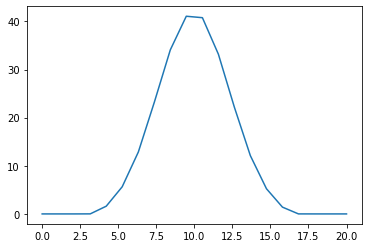

In [61]:
plt.plot(new_df.iloc[10])
#f = lambda dist_sqr, sigma: (np.exp(-1.0 * dist_sqr / (2.0 * sigma*sigma)) / (1-np.exp(-(25*sigma*sigma)/2.0))*(2. * np.pi * sigma*sigma))

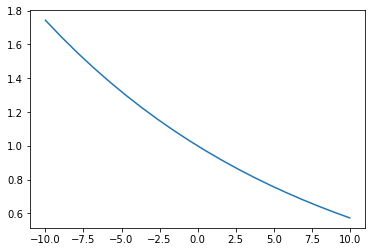

In [ ]:
l = np.linspace(-10,10,20)
new_l = []
for elt in l:
    new_l += [f(elt,3)]
plt.plot(l, new_l)

In [1]:
import sys
sys.path.append("/home/jemonet/Documents/These/Code/Graphes")
sys.path.append("/user/jemonet/home/Documents/These/stimuli")
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from figure_lib.src.data_transform.GraphDF import GraphDF
# from figure_lib.src.make_figure.figure import Figure
import seaborn as sns

import figure_lib.src.data_transform.GraphDF as gdf
import figure_lib.src.make_figure.figure as fg
import stim_help_functions as shf


#%matplotlib qt
%matplotlib inline

In [42]:
path01ms = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/tau/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,001.csv"

pd.read_csv(path01ms)

,Time,v_e (1390) CorticalExcitatory,v_i (1790) CorticalInhibitory
0,0.0000,1.246800e+00,8.486250e+00
1,0.0004,8.357520e-01,5.688500e+00
2,0.0008,5.602210e-01,3.813120e+00
3,0.0012,3.755280e-01,2.556010e+00
4,0.0016,2.517240e-01,1.713340e+00
...,...,...,...
1061,0.4244,3.090540e-71,2.037570e-71
1062,0.4248,2.071650e-71,1.365830e-71
1063,0.4252,1.388670e-71,9.155410e-72
1064,0.4256,9.308520e-72,6.137050e-72


In [117]:
importlib.reload(gdf)
importlib.reload(fg)

path01ms = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/tau/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,001.csv"
path5ms = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/tau/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,005.csv"
path10ms = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/tau/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,010.csv"
path15ms = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/tau/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,015.csv"
path20ms = "/user/jemonet/home/Documents/These/Data Macular/Retino_cortical_white_bar_flash/(current) corrections_retinocortical_branch/Cortex/tau/one_cell_noGC_noAma_noSurr_extdrive0,002_tau0,020.csv"

for i in range(5):
    path = [path01ms,path5ms,path10ms,path15ms,path20ms][i]
    tau = ["0,1ms","5ms","10ms","15ms","20ms"][i]
    
    df = gdf.GraphDF(path,0.00878,60,20,20)
    df_exc = df.isolate_dataframe_byoutputs("v_e")
    df_inh = df.isolate_dataframe_byoutputs("v_i")
    
    if i>1:
        df_exc = df_exc.isolate_dataframe_columns_bynum("1390")
        df_inh = df_inh.isolate_dataframe_columns_bynum("1790")
    df_exc.data = df_exc.data.iloc[0:1117,:]
    df_inh.data = df_inh.data.iloc[0:1117,:]
    #Crop
    #df_exc.list_col[0].cell.type = f"tau {tau}"
    df_exc.data = df_exc.data.rename(columns={"v_e (1390) CorticalExcitatory":f"v_e (1390) CorticalExcitatory tau {tau}"})
    #df_inh.list_col[0].cell.type = f"tau {tau}"
    df_inh.data = df_inh.data.rename(columns={"v_i (1790) CorticalInhibitory":f"v_i (1790) CorticalInhibitory tau {tau}"})

    if i==0:       
        df_merge_exc = df_exc
        df_merge_inh = df_inh
    else:
        df_merge_exc = df_merge_exc + df_exc
        df_merge_inh = df_merge_inh + df_inh



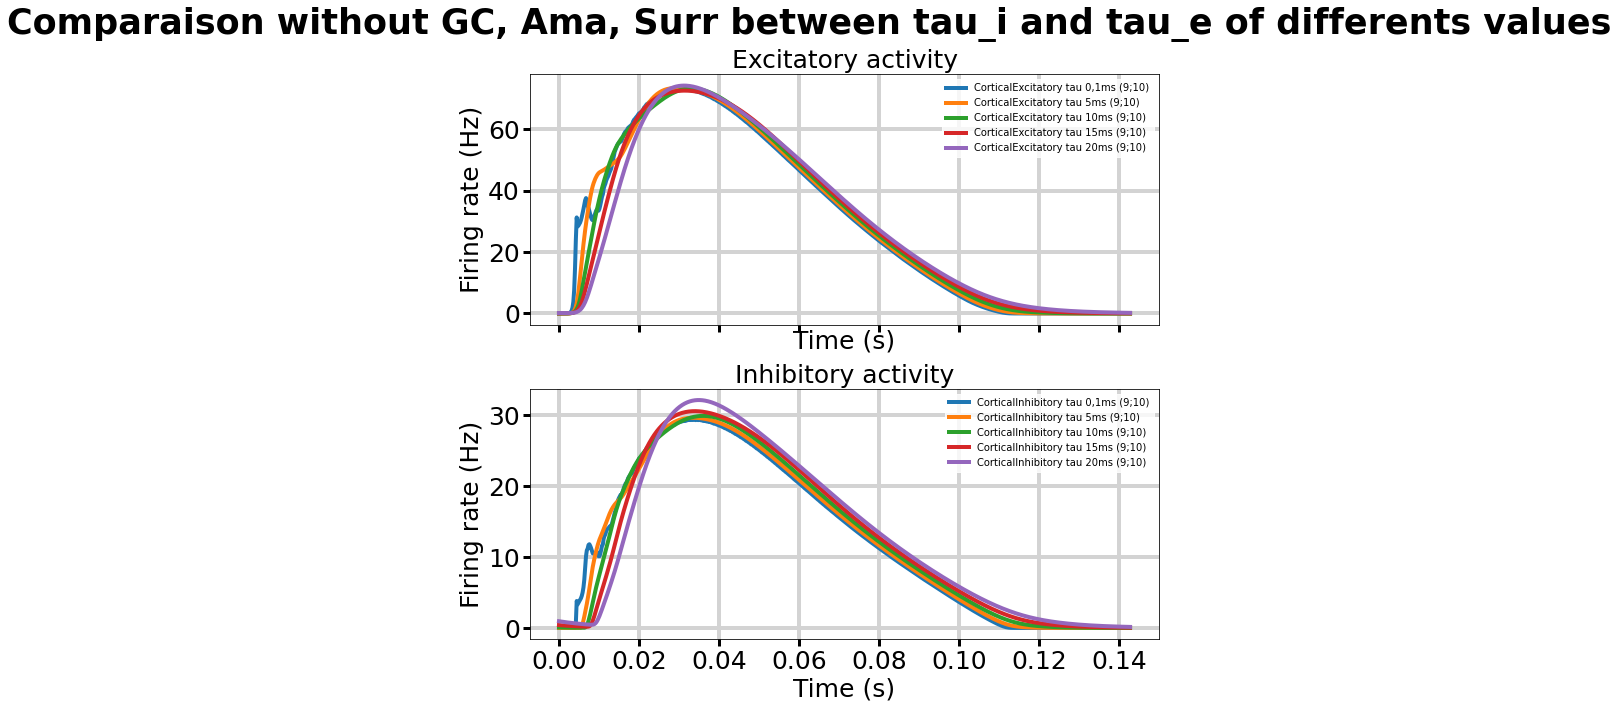

In [119]:
df_merge_exc_copy = df_merge_exc.copy()
df_merge_inh_copy = df_merge_inh.copy()

df_merge_exc = df_merge_exc.crop(0.027,0.17)
df_merge_inh = df_merge_inh.crop(0.027,0.17)


list_df = [df_merge_exc,df_merge_inh]

params_fig = dict(wspace=0.2,hspace=0.4,height_ratios=[1,1],width_ratios=[1,1])

info_fig = {"title":"Comparaison without GC, Ama, Surr between tau_i and tau_e of differents values","subtitles":["Excitatory activity","Inhibitory activity"],"xlabel":"Time (s)","ylabel":["Firing rate (Hz)","Firing rate (Hz)"],
"sharex":True,"sharey":False}

font_size = {"main_title":35, "subtitle":25, "xlabel":25, "ylabel":25, "g_xticklabel":25, "g_yticklabel":25}

params_plot = {"grid_color":"lightgray","grid_width":4,"ticklength":7,"tickwidth":3}


f = fg.Figure(list_df,2,1,dict_info_fig=info_fig, dict_font_size=font_size,dict_params_plot=params_plot)
f.set_figure_legend((1,2), fontsize=10)
plt.tight_layout()